<a href="https://colab.research.google.com/github/chaelinoh/itb2022/blob/main/%EC%A7%81%EC%97%85%EB%A7%8C%EC%A1%B1%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
import mglearn as mg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 6.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=22d6dfb4191f2579d83a8f7b0197a99eb46d2975e4c863628dd5c636dc1c0c9b
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 8.5 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [65]:
#import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings 

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm



plt.rc('font', family="NanumBarunGothic")

df = pd.read_csv('/content/drive/MyDrive/데이터분석/2019GOMS1_DATA/GP19__2020.csv', encoding='utf-8')

#데이터 실펴보기

print(df.head())
print(df.describe())

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (43,335,484,553,618,666,688,689,691,692,809,810,820,821,826,846,855,856,946,948,956,967,976,978,979,1282,1310,1321) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   g191pid  g191branch  g191found  g191course  g191daynight  g191majorcat  \
0        5           1          3           3             1             1   
1       16           1          3           3             2             1   
2       22           1          3           3             1             1   
3       32           1          3           3             1             1   
4       37           1          3           3             1             1   

  g191dpmt g191dpmt_n     g191major g191major_n  ...  g191r021  g191r022  \
0  C010101        일본어  C01010100027    비즈니스일본어과  ...         2       NaN   
1  C010101        일본어  C01010100027    비즈니스일본어과  ...         2       NaN   
2  C010101        일본어  C01010100005       관광일어과  ...         2       NaN   
3  C010101        일본어  C01010100002      관광일본어과  ...         2       NaN   
4  C010101        일본어  C01010100005       관광일어과  ...         2       NaN   

   g191r023  g191r024  g191r025  g191r026  g191r028  g191r029  g191r027  \
0    

In [ ]:
#데이터타입, null 정보 등 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18271 entries, 0 to 18270
Columns: 1332 entries, g191pid to g191wt
dtypes: float64(1140), int64(153), object(39)
memory usage: 185.7+ MB


In [66]:
df = df[['g191pid','g191sex', 'g191a018', 'g191a117', 'g191a118', 'g191a119', 'g191a122', 'g191a126', 'g191a127', 'g191a128', 'g191a129',
           'g191a130', 'g191a131', 'g191a132', 'g191a133', 'g191a134', 'g191a135', 'g191a136', 'g191a137', 'g191a138', 'g191a139', 'g191a297', 'g191a140']]

In [67]:
df.rename(columns = {'g191pid':'ID', 'g191sex':'Gender', 'g191a018':'CommuteTime', 'g191a117':'StandardHours', 'g191a118':'OvertimeHours', 'g191a119':'HolidayWork', 'g191a122':'MonthlyIncome',
                      'g191a126':'SalaryLevel', 'g191a127':'Stability', 'g191a128':'Description', 'g191a129':'Environment','g191a130':'Time', 'g191a131':'SelfDevelopment',
                      'g191a132':'Relationship', 'g191a133':'Benefits', 'g191a134':'Promotion', 'g191a135':'JobReputation', 'g191a136':'Autonomy', 'g191a137':'CompanyReputation',
                      'g191a138':'Interest', 'g191a139':'Training', 'g191a297':'TurnoverPreparation', 'g191a140':'Satisfaction'}, inplace=True)


In [ ]:
print(df.describe())

                  ID        Gender   CommuteTime  StandardHours  \
count   18271.000000  18271.000000  11858.000000   11858.000000   
mean    55903.657435      1.518910      0.223646      39.030106   
std     33406.092013      0.499656      0.492235       9.318040   
min         5.000000      1.000000     -1.000000      -1.000000   
25%     26790.000000      1.000000      0.000000      40.000000   
50%     55106.000000      2.000000      0.000000      40.000000   
75%     83327.500000      2.000000      0.000000      40.000000   
max    117674.000000      2.000000      8.000000     100.000000   

       OvertimeHours   HolidayWork  MonthlyIncome   SalaryLevel     Stability  \
count   11858.000000  11858.000000   11858.000000  11858.000000  11858.000000   
mean        2.815146      1.013577     224.500253      3.142351      3.648339   
std         5.009048      2.227108     109.700698      1.070813      1.068758   
min        -1.000000     -1.000000      -1.000000      1.000000      1.0

In [ ]:
# 결측치 확인 
df.isna().sum()


ID                        0
Gender                    0
CommuteTime            6413
StandardHours          6413
OvertimeHours          6413
HolidayWork            6413
MonthlyIncome          6413
SalaryLevel            6413
Stability              6413
Description            6413
Environment            6413
Time                   6413
SelfDevelopment        6413
Relationship           6413
Benefits               6413
Promotion              6413
JobReputation          6413
Autonomy               6413
CompanyReputation      6413
Interest               6413
Training               6413
TurnoverPreparation    6413
Satisfaction           6413
dtype: int64

In [68]:
#결측치가 존재하는 모든 행 제거

df=df.dropna()
display(df.describe())

,ID,Gender,CommuteTime,StandardHours,OvertimeHours,HolidayWork,MonthlyIncome,SalaryLevel,Stability,Description,...,Relationship,Benefits,Promotion,JobReputation,Autonomy,CompanyReputation,Interest,Training,TurnoverPreparation,Satisfaction
count,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,...,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,55461.858998,1.508180,0.223646,39.030106,2.815146,1.013577,224.500253,3.142351,3.648339,3.619750,...,3.624220,3.390622,3.155928,3.523528,3.525721,3.529938,3.553803,3.402344,1.702395,3.506915
std,33373.755918,0.499954,0.492235,9.318040,5.009048,2.227108,109.700698,1.070813,1.068758,0.982878,...,1.014341,1.084467,1.051298,0.981568,1.017708,0.978640,1.044517,1.026404,0.457224,0.911905
min,37.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26402.250000,1.000000,0.000000,40.000000,0.000000,0.000000,180.000000,2.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
50%,54145.000000,2.000000,0.000000,40.000000,0.000000,0.000000,214.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
75%,82939.500000,2.000000,0.000000,40.000000,4.000000,1.000000,260.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000
max,117668.000000,2.000000,8.000000,100.000000,60.000000,15.000000,5000.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000


In [ ]:
# 한글 폰트 사용 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,216 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [69]:
plt.rc('font',family='NanumBarunGothic')

In [70]:
#타깃 변수인 총콜레스테롤의 정상범주인 120~220을 기준으로 작으면 0 정상은 1 높으면 2로 바꿔준다
def reshape(values):
    if values < 4:
        return 0
    else:
        return 1

df['Satisfaction'] = df['Satisfaction'].apply(reshape)
df

,ID,Gender,CommuteTime,StandardHours,OvertimeHours,HolidayWork,MonthlyIncome,SalaryLevel,Stability,Description,...,Relationship,Benefits,Promotion,JobReputation,Autonomy,CompanyReputation,Interest,Training,TurnoverPreparation,Satisfaction
4,37,1,0.0,48.0,2.0,4.0,170.0,3.0,3.0,3.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0
6,49,2,0.0,11.0,0.0,0.0,40.0,2.0,4.0,4.0,...,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,1
7,59,2,0.0,6.0,0.0,0.0,45.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,1
11,99,1,0.0,18.0,0.0,0.0,35.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0
12,105,2,0.0,25.0,0.0,0.0,90.0,3.0,2.0,1.0,...,1.0,4.0,1.0,3.0,3.0,3.0,5.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,117608,2,1.0,10.0,0.0,0.0,52.0,2.0,2.0,4.0,...,3.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,1.0,0
18266,117639,1,0.0,48.0,0.0,0.0,135.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1.0,1
18267,117644,2,0.0,40.0,5.0,0.0,230.0,5.0,5.0,5.0,...,1.0,5.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0
18268,117654,1,0.0,35.0,0.0,0.0,30.0,3.0,3.0,3.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1


In [ ]:
display(df)

,ID,Gender,CommuteTime,StandardHours,OvertimeHours,HolidayWork,MonthlyIncome,SalaryLevel,Stability,Description,...,Relationship,Benefits,Promotion,JobReputation,Autonomy,CompanyReputation,Interest,Training,TurnoverPreparation,Satisfaction
4,37,1,0.0,48.0,2.0,4.0,170.0,3.0,3.0,3.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0
6,49,2,0.0,11.0,0.0,0.0,40.0,2.0,4.0,4.0,...,5.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,1
7,59,2,0.0,6.0,0.0,0.0,45.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,1
11,99,1,0.0,18.0,0.0,0.0,35.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0
12,105,2,0.0,25.0,0.0,0.0,90.0,3.0,2.0,1.0,...,1.0,4.0,1.0,3.0,3.0,3.0,5.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,117608,2,1.0,10.0,0.0,0.0,52.0,2.0,2.0,4.0,...,3.0,3.0,1.0,4.0,3.0,4.0,4.0,4.0,1.0,0
18266,117639,1,0.0,48.0,0.0,0.0,135.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1.0,1
18267,117644,2,0.0,40.0,5.0,0.0,230.0,5.0,5.0,5.0,...,1.0,5.0,5.0,4.0,1.0,1.0,5.0,5.0,2.0,0
18268,117654,1,0.0,35.0,0.0,0.0,30.0,3.0,3.0,3.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1


In [ ]:
print(df.shape)

(11858, 23)


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]   #변수 22개
y = df.iloc[:, -1]  #target 변수 satisfaction


#데이터셋을 학습(train)과 테스트(test) 세트로 분할
#random_state : random으로 분할 시 사용되는 난수 seed 숫자

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.734


In [72]:
#의사결정나무의 깊이를 5로 제한 (과적합 줄임)

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.810
시험용 데이터 정확도: 0.787


#의사결정나무
##주요변수들
- LDL 콜레스테롤 / HDL콜레스테롤 / 트리글리세라이드 가 총콜레스테롤과 가장 연관이 있음을 알 수 있다.
- HDL은 혈관벽에 침착되어 있는 콜레스테롤을 포착해 세포로 전달하므로 높을수록 몸에 좋다.
LDL은 혈관벽에 축적되면서 다양한 심혈관질환을 일으키므로 낮아야 좋다.
- 이를 바탕으로 의사결정나무 결과를 분석해보면 LDL이 134.5 이하인 경우 최종적으로 총콜레스테롤 수치가 정상인 경우가 많고 그 중에서 HDL콜레스테롤이 76.5보다 높은 경우에만 총콜레스테롤 수치가 주의 단계가 되었다.
- 의사결정나무 그래프를 바탕으로 중성지방인 트리글리세라이드가 높을 수록 총콜레스테롤 수치도 높게 나옴을 알 수 있다.

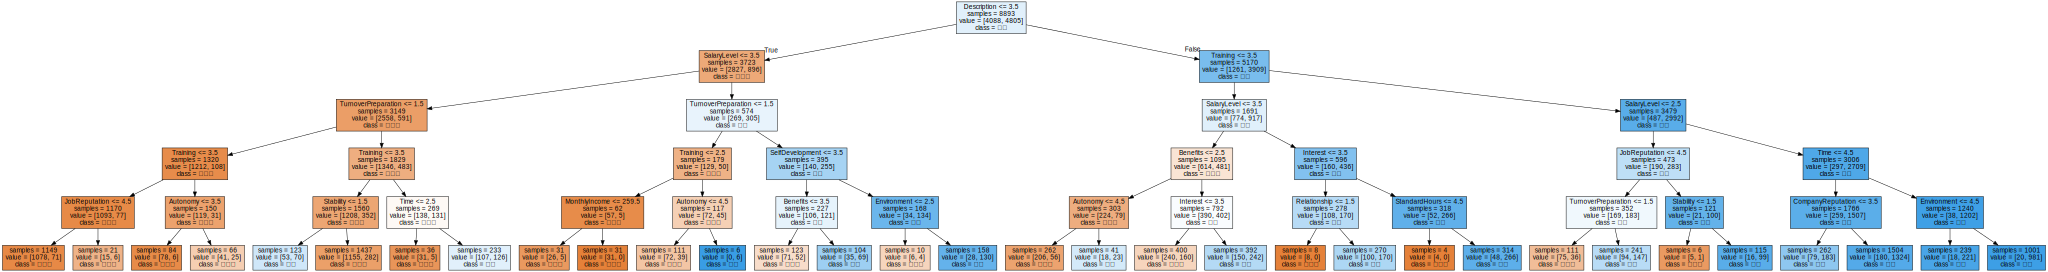

In [73]:
#  graphviz 라이브러리를 이용하여 의사결정나무 그리기
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['불만족','만족'], feature_names=df.columns[:-1], impurity=False, filled=True)


with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [74]:
#주요 변수들 찾기

result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.84257541e-03
 0.00000000e+00 0.00000000e+00 4.04383864e-04 1.28175197e-01
 1.85533073e-02 5.76653103e-01 2.27833033e-03 1.48837840e-02
 6.77790686e-03 3.08904880e-03 1.66667480e-02 0.00000000e+00
 9.52381112e-03 1.01903397e-02 7.39964346e-03 1.69078838e-02
 1.37324567e-01 4.83293706e-02]


In [75]:
df.shape

(11858, 23)

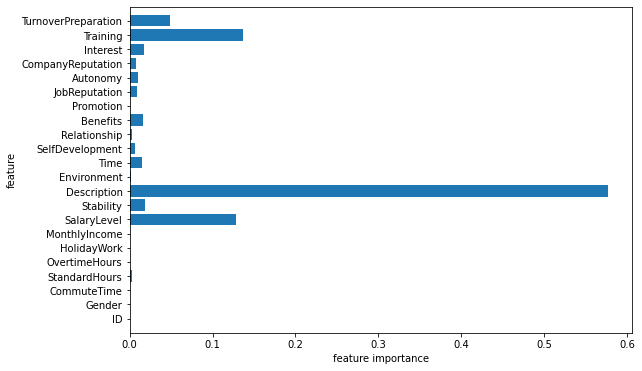

In [76]:

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df.columns[0:22])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns[0:22])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_df(tree)

#앙상블모델_ 랜덤포레스트


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


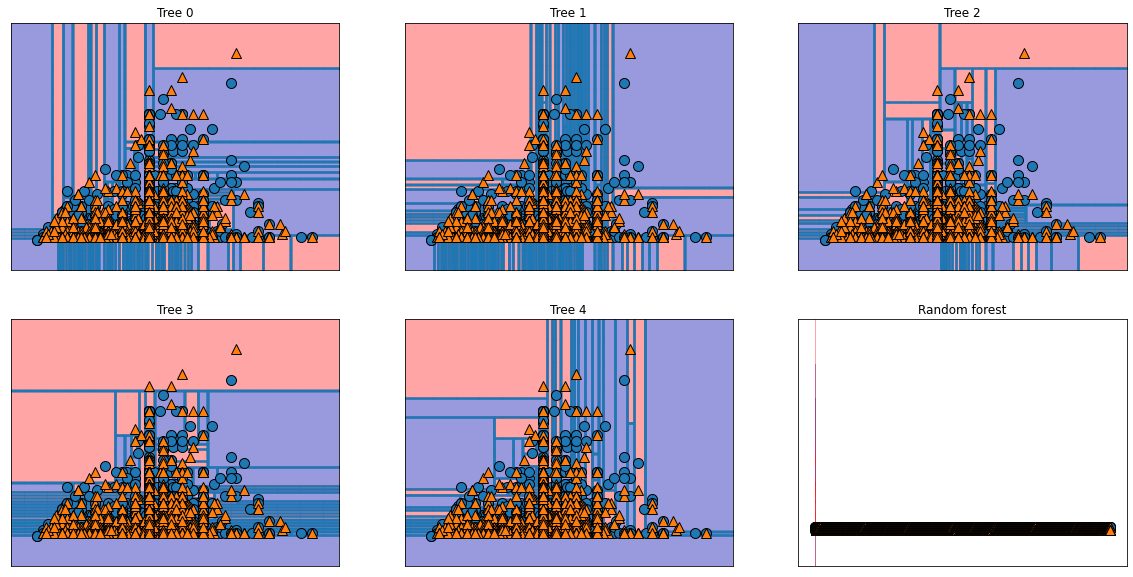

In [53]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 3:5], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 3:5].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 3:5].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [54]:

# 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))



학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.814


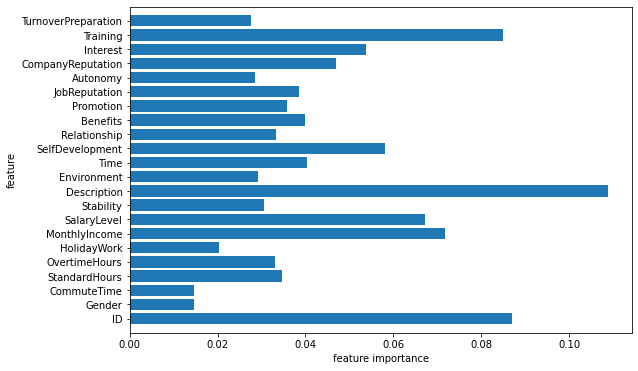

In [56]:

# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

In [57]:

from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 


Accuracy
Decision tree:  [0.74382022 0.72808989 0.73033708 0.7367829  0.74128234 0.74578178
 0.75140607 0.72440945 0.73903262 0.74915636]
Random forest:  [0.82359551 0.82808989 0.82359551 0.81327334 0.83014623 0.82564679
 0.84364454 0.82339708 0.80989876 0.82789651]
Accuracy mean
Decision tree :0.739
Random forest :0.825


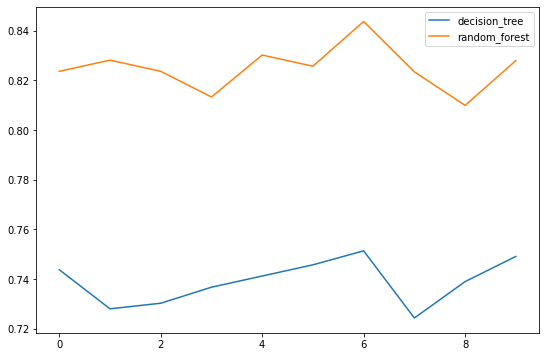

In [78]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
dfg = pd.DataFrame.from_dict(dict(cv_list))
dfg.plot()

# **그래디언트부스팅**

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 : max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.842
시험용 데이터 세트 정확도: 0.825


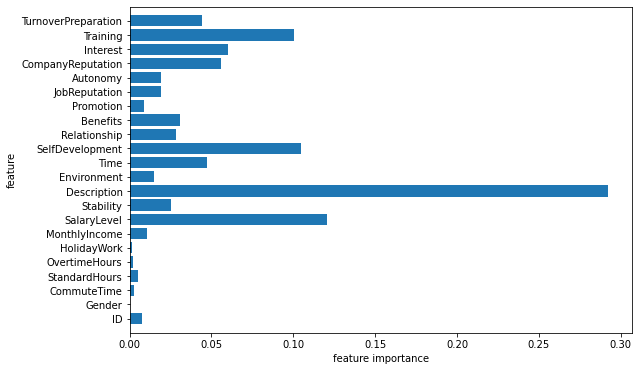

In [82]:
plot_feature_importances_df(gbrt)

In [83]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


학습 데이터 세트 정확도: 0.830
시험용 데이터 세트 정확도: 0.823


In [84]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.816
시험용 데이터 세트 정확도: 0.799


학습률 감소 이전이 시험용데이터세트 정확도가 더 높게 나왔다.

학습데이터 세트 정확도가 1이 아니므로 과적합이 아닌 것을 알 수 있다.


#**교차검증**


In [85]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 


Accuracy
Decision tree:  [0.7988764  0.79325843 0.80449438 0.79077615 0.79302587 0.7727784
 0.82339708 0.79527559 0.78065242 0.784027  ]
Random forest:  [0.82359551 0.82808989 0.82359551 0.81327334 0.83014623 0.82564679
 0.84364454 0.82339708 0.80989876 0.82789651]
Gradient boosting:  [0.81123596 0.81460674 0.81460674 0.80764904 0.81102362 0.80427447
 0.82452193 0.80314961 0.78852643 0.80314961]
Accuracy mean
Decision tree :0.794
Random forest :0.825
Gradient boosting :0.808


In [86]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.794
Random forest :0.825
Gradient boosting :0.808


#**그리드서치**

In [87]:

from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}



In [88]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.814910,9,0.817538,0.819163,0.808030
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.821208,4,0.818887,0.827598,0.817139
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.822220,2,0.823946,0.826586,0.816127
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.814236,10,0.816863,0.817814,0.808030
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.818622,6,0.813491,0.827598,0.814777
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.821995,3,0.823946,0.823212,0.818826
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.811087,12,0.814503,0.814440,0.804318
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.818284,7,0.814840,0.825574,0.814440
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.823344,1,0.825632,0.827598,0.816802
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.809288,14,0.810455,0.817139,0.800270


In [89]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))


GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.8233


In [90]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))


시험용 데이터 세트 정확도: 0.822


#**모델평가**

##정오분류표


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))


1    1607
0    1358
Name: Satisfaction, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.787
[[ 999  359]
 [ 274 1333]]
Random forest 시험용 데이터 세트 정확도:0.814
[[1083  275]
 [ 277 1330]]
Gradient boosting 시험용 데이터 세트 정확도:0.822
[[1108  250]
 [ 279 1328]]


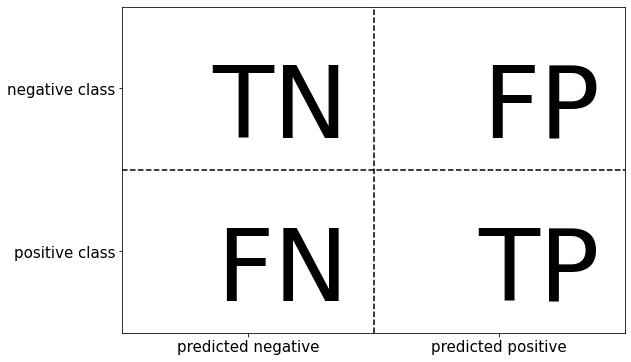

In [95]:

mglearn.plots.plot_binary_confusion_matrix()

In [98]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_gbrt_pred, average='binary', pos_label=1)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_gbrt_pred, average='binary', pos_label=1)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_gbrt_pred, average='binary', pos_label=1)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.842
TP (49) / TP+FP (52) = 0.942
재현율:0.826
TP (49) / TP+FN (51) = 0.961
f1-measure:0.834
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [99]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("M"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["B", "M"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["B", "M"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["B", "M"]))


Decision Tree:
              precision    recall  f1-score   support

           B       0.78      0.74      0.76      1358
           M       0.79      0.83      0.81      1607

    accuracy                           0.79      2965
   macro avg       0.79      0.78      0.78      2965
weighted avg       0.79      0.79      0.79      2965

Random Forest:
              precision    recall  f1-score   support

           B       0.80      0.80      0.80      1358
           M       0.83      0.83      0.83      1607

    accuracy                           0.81      2965
   macro avg       0.81      0.81      0.81      2965
weighted avg       0.81      0.81      0.81      2965

Gradient Boosting:
              precision    recall  f1-score   support

           B       0.80      0.82      0.81      1358
           M       0.84      0.83      0.83      1607

    accuracy                           0.82      2965
   macro avg       0.82      0.82      0.82      2965
weighted avg       0.82  

#**ROC (Receiver Operator Characteristic) 곡선과 AUC (Area Under the Curve)**

[[0.45922747 0.54077253]
 [0.93820714 0.06179286]
 [0.6        0.4       ]
 ...
 [0.01998002 0.98001998]
 [0.11968085 0.88031915]
 [0.38265306 0.61734694]]


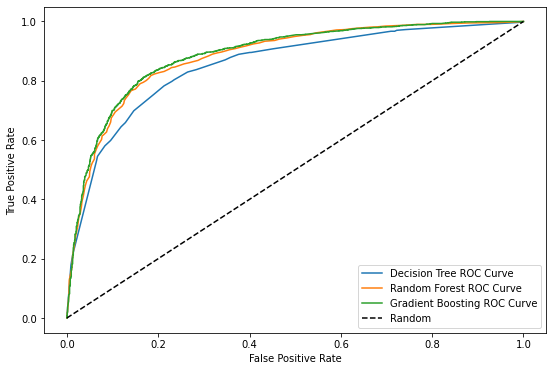

In [101]:

from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1], pos_label=1)
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1], pos_label=1)
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 


In [102]:

auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델



Decision Tree의 AUC: 0.853
Random Forest의 AUC: 0.882
Gradient Boosting의 AUC: 0.889
